In this notebook, I will compare several binary classification models using a simulated dataset.

In [1]:
# create simulated data
from sklearn.datasets import make_classification

X, Y = make_classification(n_samples = 1000,
                           n_features = 2,
                           n_informative = 2,
                           n_redundant = 0,
                           n_clusters_per_class = 1,
                           random_state = 47)

In [2]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 47)

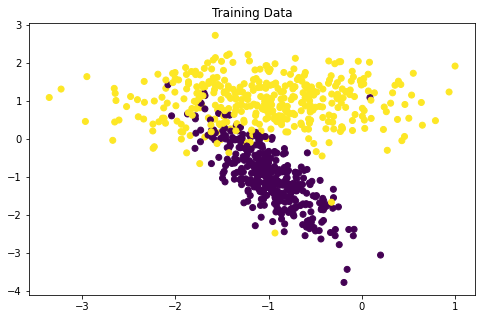

In [3]:
# plot the training data
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(X_train[:,0], X_train[:,1], c = Y_train)
plt.title('Training Data')
plt.show()

In [4]:
# import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [5]:
# fit logistic regression with default parameters
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
# obtain prediction accuracy on test data 
log_reg.score(X_test, Y_test)

0.928

In [6]:
# fit the decision tree classifier with default parameters
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, Y_train)
# obtain prediction accuracy on test data
dt_clf.score(X_test, Y_test)

0.944

In [7]:
# fit linear SVC with default parameters
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
# obtain prediction accuracy on test data
linear_svc.score(X_test, Y_test)

0.928

In [8]:
# fit K-neighbors classifier with default parameters
kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train, Y_train)
# obtain prediction accuracy on the test data
kn_clf.score(X_test, Y_test)

0.952

In [9]:
# fit the random forrest classifier with default parameters
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, Y_train)
# obtain prediction accuracy on the test data
rf_clf.score(X_test, Y_test)

0.944

In [10]:
# fit the gradient boosting classifier with default parameters
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, Y_train)
# obtain prediction accuracy on the test data
gb_clf.score(X_test, Y_test)

0.952

In [11]:
# create a binary classification model in Keras
from keras.models import Sequential
from keras.layers import Dense

# three layer model with 2 feature input and sigmoid output
model = Sequential([
    Dense(30, input_shape=(2,), activation = 'relu'),
    Dense(30, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])
# compile the model using binary crossentropy as the loss function and
# binary accuracy as the evaluation metric
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])
model.fit(X_train, Y_train, epochs = 50)
# evaluate using the test data
model.evaluate(X_test, Y_test)

Epoch 1/50
24/24 [==============================] - 0s 2ms/step - loss: 0.5843 - binary_accuracy: 0.7307
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 0.4299 - binary_accuracy: 0.9053
Epoch 3/50
24/24 [==============================] - 0s 2ms/step - loss: 0.3276 - binary_accuracy: 0.9133
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2651 - binary_accuracy: 0.9227
Epoch 5/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2334 - binary_accuracy: 0.9293
Epoch 6/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2203 - binary_accuracy: 0.9293
Epoch 7/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2132 - binary_accuracy: 0.9267
Epoch 8/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2098 - binary_accuracy: 0.9267
Epoch 9/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2103 - binary_accuracy: 0.9267
Epoch 10/50
24/24 [==============================] - 0s

[0.14954553544521332, 0.9520000219345093]

In [12]:
# create a binary classification model in PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F

class TorchBinaryClassifier(nn.Module):
    def __init__(self):
        super(TorchBinaryClassifier, self).__init__()
        # 3 layer NN similar to the one done in Keras
        self.fc1 = nn.Linear(2, 30)
        self.fc2 = nn.Linear(30, 30)
        self.fc3 = nn.Linear(30, 1)
        # sigmoid layer for classification
        self.sig = nn.Sigmoid()
        
    def forward(self, x):
        # apply ReLU after each of the first two layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        # apply sigmoid function before returning the value
        x = self.sig(x)
        
        return x
    
net = TorchBinaryClassifier()

In [13]:
# specify loss and optimizer
import torch.optim as optim

criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters())

In [14]:
# speficy train and test data
from torch.utils.data import TensorDataset, DataLoader

X_train_tensor = torch.from_numpy(X_train).float()
Y_train_tensor = torch.from_numpy(Y_train).float()

X_test_tensor = torch.from_numpy(X_test).float()
Y_test_tensor = torch.from_numpy(Y_test).float()

trainset = TensorDataset(X_train_tensor, Y_train_tensor)
testset = TensorDataset(X_test_tensor, Y_test_tensor)

train_loader = DataLoader(trainset)
test_loader = DataLoader(testset)